In [1]:
import pandas as pd
import numpy as np

# import os
# import sys
# module_path = os.path.abspath(os.path.join('..'))
# print(module_path)
# sys.path.append(module_path)
import model.parts.utils as utils
from model.sys_params import *
df = pd.read_pickle(r'index_spoofer_experiment.p')

stakeDelegateds: 605 events
stakeDelegatedLockeds: 375 events
stakeDelegatedWithdrawns: 326 events
allocationCloseds: 47 events
allocationCollecteds: 16 events
stakeDepositeds: 25 events
rewardsAssigneds: 47 events
delegationParametersUpdateds: 6 events
allocationCreateds: 51 events
TOTAL NUMBER OF EVENTS: 1529
You should set SIMULATION_TIME_STEPS in config.py to a minimum of 1529 to capture all events.



In [2]:
df.head()
df.reset_index(inplace = True)

In [3]:
df['indexers'][2][1].holdings

0

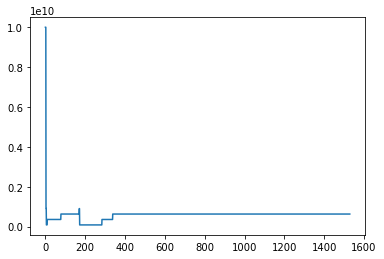

In [4]:
import matplotlib.pyplot as plt
GRT_list = []
for i in df['indexers']:
    GRT_list.append(i[1].GRT)
plt.plot(df.index, GRT_list)

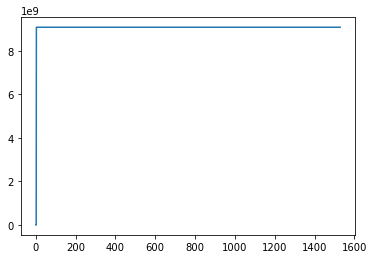

In [5]:
indexer_revenue_list = []
for i in df['indexers']:
    if i[1].cumulative_indexing_revenue is not None:
        indexer_revenue_list.append(i[1].cumulative_deposited_stake)
    else:
        indexer_revenue_list.append(0)
plt.plot(df.index, indexer_revenue_list)

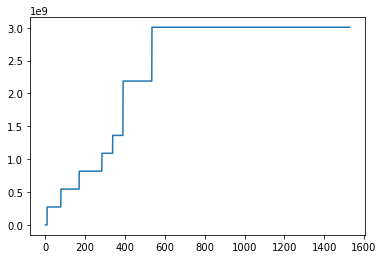

In [6]:
indexer_holdings_list = []
for i in df['indexers']:
    if i[1].holdings is not None:
        indexer_holdings_list.append(i[1].holdings)
    else:
        indexer_holdings_list.append(0)
plt.plot(df.index, indexer_holdings_list)

In [7]:
df['indexers'][1500][1].subgraphs['1'].allocations['1'].tokens

0

In [8]:
df['indexers'][1500][1].delegators

{1: self.id=1, self.shares=Decimal('0E-18'), self.holdings=Decimal('8554957640.805028760256833478'), self.undelegated_tokens=Decimal('0E-18')}

In [9]:
df['indexers'][1500][1].delegators

{1: self.id=1, self.shares=Decimal('0E-18'), self.holdings=Decimal('8554957640.805028760256833478'), self.undelegated_tokens=Decimal('0E-18')}

(100000000.0, 15000000000.0)

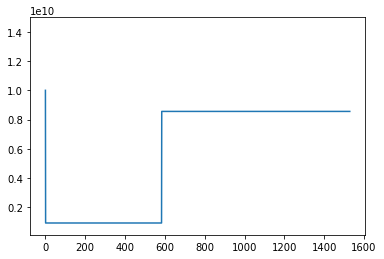

In [10]:
holdings_list = []
for i in df['indexers']:
    if 1 not in i[1].delegators:
        holdings_list.append(0)
    else:
        holdings_list.append(i[1].delegators[1].holdings)
plt.plot(df.index, holdings_list)
plt.ylim(1e8, 1.5e10)

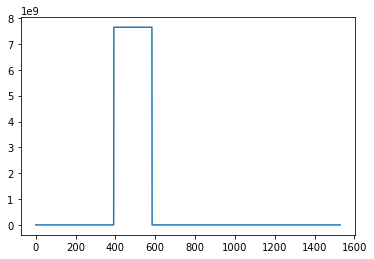

In [11]:
undelegated_list = []
for i in df['indexers']:
    if 1 not in i[1].delegators:
        undelegated_list.append(0)
    else:
        undelegated_list.append(i[1].delegators[1].undelegated_tokens)
plt.plot(df.index, undelegated_list)

Here we see that the agent undelegates after setting the index reward to 0.

In [12]:
df['indexers'][1234][1].indexer_revenue_cut

0.001

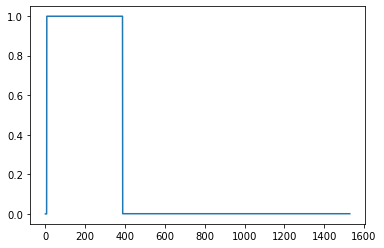

In [13]:
subgraph_list = []
for i in df['indexers']:
    if i[1].indexer_revenue_cut == None:
        subgraph_list.append(0)
    else:
        subgraph_list.append(i[1].indexer_revenue_cut)
plt.plot(df.index, subgraph_list)

Here we see that after the desired waiting period, the spoofer sets the revenue cut to 0%.

In [14]:
df['indexers'][1500][1].subgraphs['1'].indexing_fees
 

0

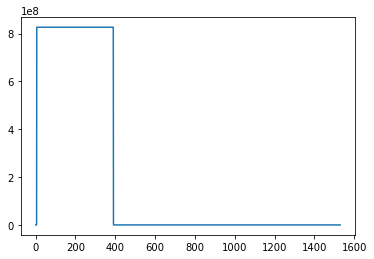

In [16]:
alloc_list = []
for i in df['indexers']:
    if '1' in i[1].subgraphs['1'].allocations.keys():
        alloc_list.append(i[1].subgraphs['1'].allocations['1'].tokens)
    else: 
        alloc_list.append(0)
plt.plot(df.timestep, alloc_list)

Here we see that the allocation gets closed after the spoofer sets the cut to 0%.

10000000000
10000000000


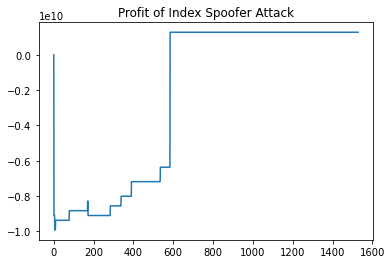

In [17]:
profit_list = []
initial_GRT = df['indexers'][0][1].GRT
initial_holdings = df['indexers'][0][1].delegators[1].holdings
print(initial_GRT)
print(initial_holdings)
for i in df['indexers']:
    if i[1].holdings is not None:
        profit_list.append(i[1].holdings + i[1].GRT + i[1].delegators[1].holdings + i[1].cumulative_deposited_stake \
         - initial_GRT - initial_holdings)
    else:
        profit_list.append(0)
plt.plot(df.index, profit_list)
plt.title('Profit of Index Spoofer Attack');


Here we see the profit of the attack after they set the cut to 0 and withdraw their tokens from the pool.